# Construção de um gráfico em papel milimetrado

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FixedLocator

## Construindo o papel com as dimensões vertical e horizontal em milímetros

In [2]:
v = 190
h = 130

div_v = range(0, v+1, 10)
div_h = range(0, h+1, 10)

Construindo o papel milimetrado

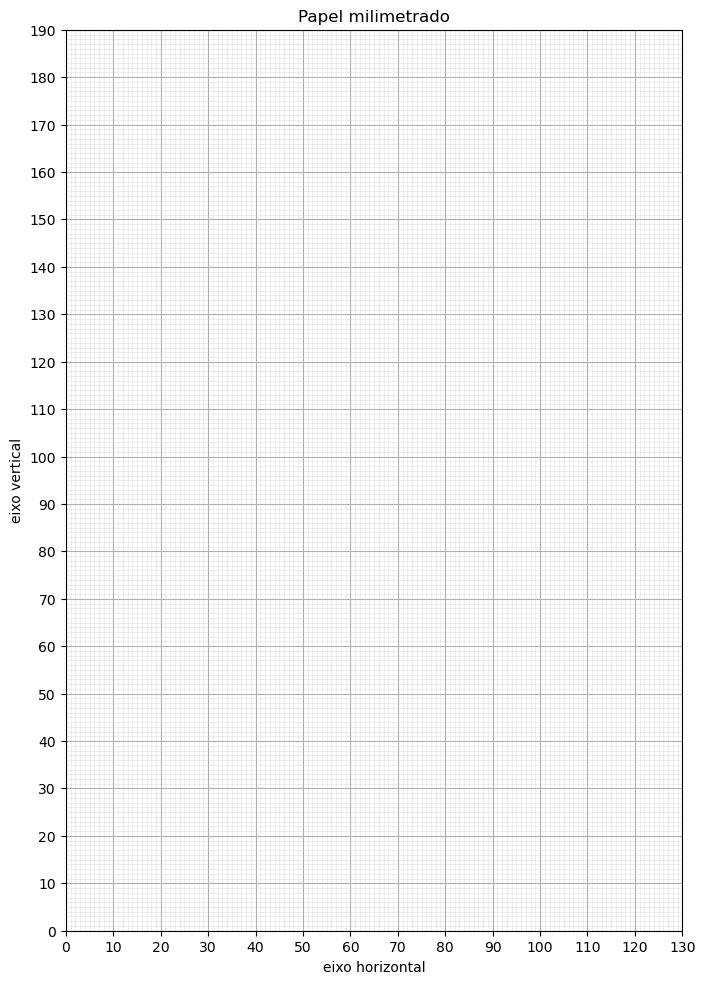

In [3]:
fig, ax = plt.subplots(figsize=(8.3, 11.7))


ax.set_aspect(1)


ax.set_title('Papel milimetrado')
ax.set_xlabel('eixo horizontal')
ax.set_ylabel('eixo vertical')

ax.set_xlim(div_h[0],div_h[-1])
ax.set_ylim(div_v[0],div_v[-1])

# grid lines
ax.grid(which = "major")
ax.grid(which = "minor", alpha = 0.2)
ax.set_axisbelow(True)

ax.tick_params(which = "minor", bottom = False, left = False)

#  major grid do eixo horizontal
ax.xaxis.set_major_locator(FixedLocator(div_h))

#  major grid do eixo vertical
ax.yaxis.set_major_locator(FixedLocator(div_v))

# Minor grid dividindo o major grid em 10
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))


## Criando um conjunto de dados de exemplo

Função para arredondar para 1 algarismo significativo

In [4]:
from math import log10, floor

def round_it(x, sig):
    return round(x, sig - int(floor(log10(abs(x)))) - 1)

In [5]:
x = np.array([1.25, 17.37, 21, 34.50, 48.92])
y = 0.1*x+120
y_err = [round_it(0.01*y[i],1) for i in range(len(y))]
y_err, y-y_err, y+y_err

([1.0, 1.0, 1.0, 1.0, 1.0],
 array([119.125, 120.737, 121.1  , 122.45 , 123.892]),
 array([121.125, 122.737, 123.1  , 124.45 , 125.892]))

## Cálculo da melhor escala

Cálculo da escala natural:

In [6]:
delta_x = x.max()-x.min()
delta_y = (y+y_err).max()-(y-y_err).min()
delta_x, delta_y

(47.67, 6.766999999999996)

In [7]:
escala_natural_x = delta_x/h
escala_natural_y = delta_y/v
escala_natural_x, escala_natural_y

(0.3666923076923077, 0.03561578947368419)

Cálculo da melhor escala: arredondar a escala natural para cima fazendo com que o primeiro algarismo significativo seja 1, 2 ou 5.

In [8]:
from decimal import Decimal

def fexp(number):
    (sign, digits, exponent) = Decimal(number).as_tuple()
    return len(digits) + exponent - 1

def fman(number):
    return float(Decimal(number).scaleb(-fexp(number)).normalize())

def escala_boa(num):
    exp = fexp(num)
    if fman(num) / 5 == 1 or fman(num) / 2 == 1 or fman(num) == 1:
        return num
    if fman(num) / 5 > 1:
        return 10*10**exp
    if fman(num) / 2 > 1:
        return 5*10**exp
    if fman(num) > 1:
        return 2*10**exp
    return 10**exp


In [9]:
escala_x = escala_boa(escala_natural_x)
escala_y = escala_boa(escala_natural_y)
escala_x, escala_y

(0.5, 0.05)

In [10]:
delta_bom_x = h*escala_x
delta_bom_y = v*escala_y
delta_bom_x, delta_bom_y

(65.0, 9.5)

In [11]:
sobra_x = delta_bom_x-delta_x
sobra_y = delta_bom_y-delta_y
sobra_x/2, sobra_y/2

(8.665, 1.366500000000002)

In [12]:
lim_x = [x.min()-sobra_x/2, x.max()+sobra_x/2]
lim_y = [(y-y_err).min()-sobra_y/2, (y+y_err).max()+sobra_y/2]

lim_x, lim_x[1]-lim_x[0], lim_y, lim_y[1]-lim_y[0]

([-7.414999999999999, 57.585], 65.0, [117.7585, 127.2585], 9.5)

In [13]:
def limite_bom(esc, num):
    esc_cm = 10*esc
    return round(num / esc_cm) * esc_cm

In [14]:
limite_bom_x = limite_bom(escala_x, lim_x[1])
limite_bom_y = limite_bom(escala_y, lim_y[1])

escala_x, lim_x[1], limite_bom_x, escala_y, lim_y[1], limite_bom_y


(0.5, 57.585, 60.0, 0.05, 127.2585, 127.5)

In [15]:
div_x = [limite_bom_x-escala_x*h+escala_x*10*i for i in range(0,int(h/10+1))]
div_y = [limite_bom_y-escala_y*v+escala_y*10*i for i in range(0,int(v/10+1))]

div_x, div_y

([-5.0,
  0.0,
  5.0,
  10.0,
  15.0,
  20.0,
  25.0,
  30.0,
  35.0,
  40.0,
  45.0,
  50.0,
  55.0,
  60.0],
 [118.0,
  118.5,
  119.0,
  119.5,
  120.0,
  120.5,
  121.0,
  121.5,
  122.0,
  122.5,
  123.0,
  123.5,
  124.0,
  124.5,
  125.0,
  125.5,
  126.0,
  126.5,
  127.0,
  127.5])

Convertendo a escala de x para mm 

In [16]:
x_mm = (x - div_x[0]) / escala_x
y_mm = (y+y_err - div_y[0]) / escala_y

def teste(lista):
    for i in range(len(lista)):
        if lista[i] < 0:
            return 'ERRO'
        else:
            return 'OK'
teste(x_mm), teste(y_mm)

('OK', 'OK')

<ErrorbarContainer object of 3 artists>

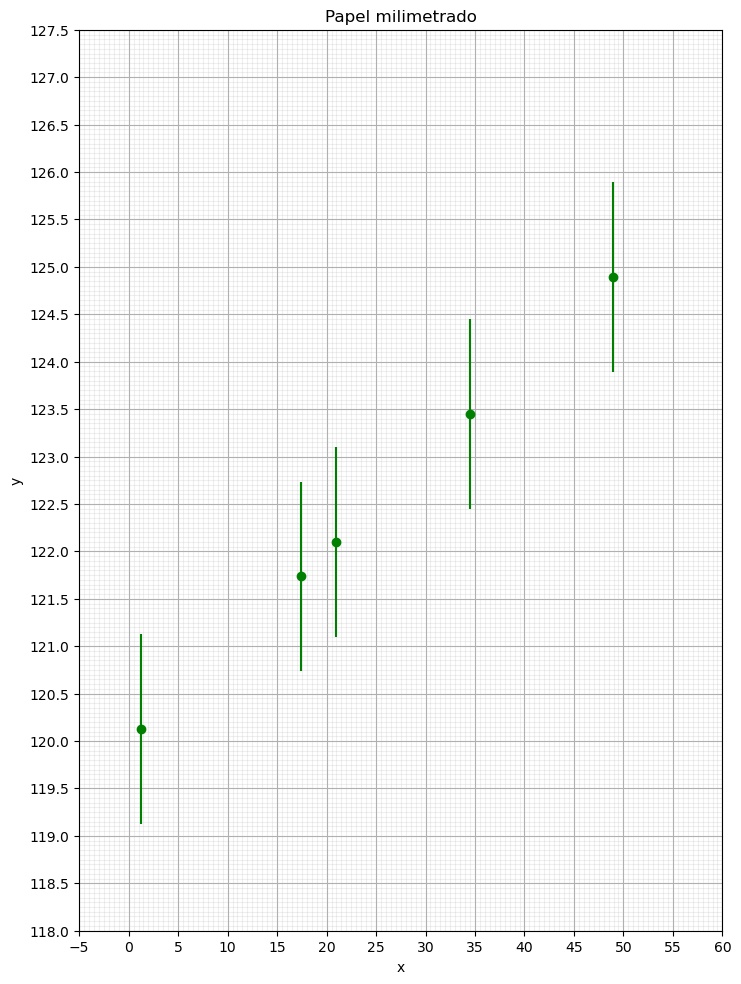

In [17]:
fig, ax = plt.subplots(figsize=(8.3, 11.7))


# ax.set_aspect(1)


ax.set_title('Papel milimetrado')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim(div_x[0],div_x[-1])
ax.set_ylim(div_y[0],div_y[-1])

# grid lines
ax.grid(which = "major")
ax.grid(which = "minor", alpha = 0.2)
ax.set_axisbelow(True)

ax.tick_params(which = "minor", bottom = False, left = False)

#  major grid do eixo horizontal
ax.xaxis.set_major_locator(FixedLocator(div_x))

#  major grid do eixo vertical
ax.yaxis.set_major_locator(FixedLocator(div_y))

# Minor grid dividindo o major grid em 10
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# plot
ax.errorbar(
    x,
    y,
    yerr = y_err,
    marker='o',
    linestyle='none',
    color='green',
    label='dados experimentais',
)


In [18]:
x

array([ 1.25, 17.37, 21.  , 34.5 , 48.92])

In [19]:
x_mm

array([ 12.5 ,  44.74,  52.  ,  79.  , 107.84])

In [20]:
y

array([120.125, 121.737, 122.1  , 123.45 , 124.892])

In [21]:
y_mm

array([ 62.5 ,  94.74, 102.  , 129.  , 157.84])